In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(f"Downloads/Working Files/archive (1).zip", compression='zip')
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [5]:
data.duplicated().sum()

np.int64(0)

# Duplicates in specific columns

In [6]:
dups = data.loc[data['PatientId'].duplicated()]
dups

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
27,1.215484e+13,5628345,F,2016-04-27T10:51:45Z,2016-04-29T00:00:00Z,4,CONQUISTA,0,0,0,0,0,0,No
154,1.925263e+10,5636933,F,2016-04-28T16:38:34Z,2016-04-29T00:00:00Z,30,ITARARÉ,0,0,0,0,0,0,No
288,2.246214e+13,5532908,M,2016-03-31T12:39:06Z,2016-04-29T00:00:00Z,43,CARATOÍRA,0,0,0,0,0,1,Yes
290,7.222383e+12,5566070,M,2016-04-11T09:50:18Z,2016-04-29T00:00:00Z,7,CARATOÍRA,0,0,0,0,0,1,No
316,1.756579e+13,5582867,F,2016-04-14T10:01:09Z,2016-04-29T00:00:00Z,1,JOANA D´ARC,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


### Above is not concerning, patients are allowed to book multiple appointments

In [7]:
data['AppointmentID'].duplicated().any()

np.False_

### Duplicates in above col would be concerning

# Fixing Formating
- Stripping the str
- Datetime conversion

In [8]:
# remove the time part
data['ScheduledDay'] = data['ScheduledDay'].str[:10]
data['AppointmentDay'] = data['AppointmentDay'].str[:10]

# format to datetime
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])

data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
data.describe().round(2)

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,110527.00,110527,110527,110527.00,110527.0,110527.0,110527.00,110527.00,110527.00,110527.00
mean,1.474963e+14,5675305.12,2016-05-08 20:33:18.179630080,2016-05-19 00:57:50.008233472,37.09,0.1,0.2,0.07,0.03,0.02,0.32
min,3.921784e+04,5030230.00,2015-11-10 00:00:00,2016-04-29 00:00:00,-1.00,0.0,0.0,0.00,0.00,0.00,0.00
25%,4.172614e+12,5640285.50,2016-04-29 00:00:00,2016-05-09 00:00:00,18.00,0.0,0.0,0.00,0.00,0.00,0.00
50%,3.173184e+13,5680573.00,2016-05-10 00:00:00,2016-05-18 00:00:00,37.00,0.0,0.0,0.00,0.00,0.00,0.00
75%,9.439172e+13,5725523.50,2016-05-20 00:00:00,2016-05-31 00:00:00,55.00,0.0,0.0,0.00,0.00,0.00,1.00
max,9.999816e+14,5790484.00,2016-06-08 00:00:00,2016-06-08 00:00:00,115.00,1.0,1.0,1.00,1.00,4.00,1.00
std,2.560949e+14,71295.75,NaN,NaN,23.11,0.3,0.4,0.26,0.17,0.16,0.47


### Removing impossible values

In [10]:
negative_age = data.loc[data['Age'] <= -1]
negative_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [11]:
# drop above row. It must be an error, Age can't be negative
data = data[data['Age'] != -1]
print(data.iloc[99832])  # check that the row has indeed dropped check Age != -1

PatientId            28982712699339.0
AppointmentID                 5774075
Gender                              M
ScheduledDay      2016-06-06 00:00:00
AppointmentDay    2016-06-06 00:00:00
Age                                 1
Neighbourhood          FORTE SÃO JOÃO
Scholarship                         0
Hipertension                        0
Diabetes                            0
Alcoholism                          0
Handcap                             0
SMS_received                        0
No-show                            No
Name: 99833, dtype: object


# Category Encoding

In [12]:
# for performance enhancement
data['Scholarship'] = data['Scholarship'].astype('category')
data['Hipertension'] = data['Hipertension'].astype('category')
data['Diabetes'] = data['Diabetes'].astype('category')
data['Alcoholism'] = data['Alcoholism'].astype('category')
data['Handcap'] = data['Handcap'].astype('category')
data['SMS_received'] = data['SMS_received'].astype('category')

In [13]:
data.describe().round(2)

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age
count,1.105260e+05,110526.00,110526,110526,110526.00
mean,1.474934e+14,5675304.22,2016-05-08 20:32:56.179360256,2016-05-19 00:57:35.968731392,37.09
min,3.921784e+04,5030230.00,2015-11-10 00:00:00,2016-04-29 00:00:00,0.00
25%,4.172536e+12,5640285.25,2016-04-29 00:00:00,2016-05-09 00:00:00,18.00
50%,3.173184e+13,5680572.00,2016-05-10 00:00:00,2016-05-18 00:00:00,37.00
75%,9.438963e+13,5725522.75,2016-05-20 00:00:00,2016-05-31 00:00:00,55.00
max,9.999816e+14,5790484.00,2016-06-08 00:00:00,2016-06-08 00:00:00,115.00
std,2.560943e+14,71295.44,NaN,NaN,23.11


## Datetime Extractions
- See value count for specific days
- Feature engineering ("Wait time" from "Appointment Day" and "Scheduled Day")

In [14]:
data['ScheduledWeekday'] = data['ScheduledDay'].dt.day_name()
data['AppointmentWeekday'] = data['AppointmentDay'].dt.day_name()
data['WaitTime'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days

data['ScheduledWeekday'].value_counts()

ScheduledWeekday
Tuesday      26168
Wednesday    24262
Monday       23084
Friday       18915
Thursday     18073
Saturday        24
Name: count, dtype: int64

In [15]:
data['AppointmentWeekday'].value_counts()

AppointmentWeekday
Wednesday    25867
Tuesday      25640
Monday       22714
Friday       19019
Thursday     17247
Saturday        39
Name: count, dtype: int64

In [16]:
data['WaitTime'].value_counts()

WaitTime
 0      38562
 2       6725
 4       5290
 1       5213
 7       4906
        ...  
-6          1
 132        1
 117        1
 146        1
 123        1
Name: count, Length: 131, dtype: int64

## dropping no shows with long wait
- Reason for the no show can be assumed to be the long wait (maybe they got better)

In [17]:
noshow_longwait = data[(data['No-show'] == 'Yes') & (data['WaitTime'] > 14)]
noshow_longwait

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledWeekday,AppointmentWeekday,WaitTime
49,9.223559e+13,5534656,F,2016-03-31,2016-04-29,27,GRANDE VITÓRIA,0,0,0,0,0,1,Yes,Thursday,Friday,29
50,1.827172e+14,5534661,F,2016-03-31,2016-04-29,19,GRANDE VITÓRIA,0,0,0,0,0,1,Yes,Thursday,Friday,29
51,4.694699e+13,5534635,F,2016-03-31,2016-04-29,23,GRANDE VITÓRIA,1,0,0,0,0,1,Yes,Thursday,Friday,29
52,7.987570e+14,5534639,F,2016-03-31,2016-04-29,23,GRANDE VITÓRIA,1,0,0,0,0,1,Yes,Thursday,Friday,29
116,4.673335e+12,5574680,F,2016-04-12,2016-04-29,18,SANTO ANTÔNIO,0,0,0,0,0,1,Yes,Tuesday,Friday,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110461,3.346245e+12,5628114,F,2016-04-27,2016-06-03,13,RESISTÊNCIA,0,0,0,0,0,1,Yes,Wednesday,Friday,37
110469,8.322564e+14,5656075,F,2016-05-04,2016-06-07,51,RESISTÊNCIA,0,0,0,0,0,1,Yes,Wednesday,Tuesday,34
110470,4.125933e+12,5692391,F,2016-05-12,2016-06-02,26,RESISTÊNCIA,0,0,0,0,0,1,Yes,Thursday,Thursday,21
110479,4.455244e+12,5638153,F,2016-04-29,2016-06-06,34,RESISTÊNCIA,1,0,0,0,0,1,Yes,Friday,Monday,38


In [18]:
data = data[~data.index.isin(noshow_longwait.index)]
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledWeekday,AppointmentWeekday,WaitTime
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday,0


## No Shows by Age Group

In [19]:
kids = data[(data['No-show'] == 'Yes') & (data['Age'] < 20)]
twenties = data[(data['No-show'] == 'Yes') & (data['Age'] >= 20) & (data['Age'] < 30)]
thirties = data[(data['No-show'] == 'Yes') & (data['Age'] >= 30) & (data['Age'] < 40)]
fourties = data[(data['No-show'] == 'Yes') & (data['Age'] >= 40) & (data['Age'] < 50)]
fifties = data[(data['No-show'] == 'Yes') & (data['Age'] >= 50) & (data['Age'] < 60)]
sixties = data[(data['No-show'] == 'Yes') & (data['Age'] >= 60) & (data['Age'] < 70)]
seventies = data[(data['No-show'] == 'Yes') & (data['Age'] >= 70) & (data['Age'] < 80)]

len(kids)

3922

In [20]:
len(data)

101440

## One Hot Encoding

In [46]:
data['No-show'] = data['No-show'].replace({'Yes': 1, 'No': 0}).astype(int)

# Model Training

### Detecting muliticollinearity

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
data['Scholarship'].dtype

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

In [41]:
# enc_data = pd.get_dummies(data, columns=['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received', 'Handcap'])

# decided against this approach because it creates colA_0 colA_1, colB_0 colB_1 which is unnecesary because cols are already encoded

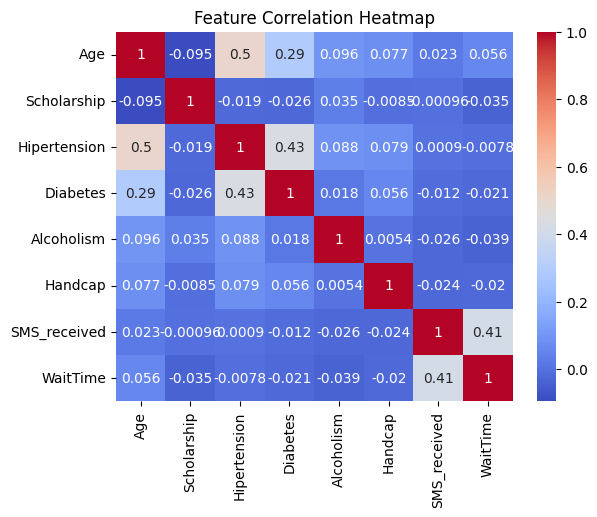

In [39]:
heat_data = data.drop(columns=['PatientId', 'AppointmentID', 'Gender', 'Neighbourhood', 
                               'No-show', 'ScheduledWeekday', 'AppointmentWeekday', 
                               'ScheduledDay', 'AppointmentDay'])
sns.heatmap(heat_data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

- Corr is not high (-0.8> & < 0.8)
- No need to remove nor combine them


### Model Fitting

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(data[['Scholarship', 'Hipertension', 'Age', 'WaitTime', 
                                                                      'Diabetes', 'Alcoholism', 'SMS_received', 
                                                                      'Handcap']], data['No-show'], test_size=0.02, random_state=42)

In [81]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
y_pred = model.predict(X_test)
print(f"R Score: {r2_score(y_test, y_pred):.4f}")

R Score: 0.0171


In [82]:
y_pred = model.predict(X_test)
print(f"R Score: {r2_score(y_test, y_pred):.4f}")

R Score: 0.0214
